In [ ]:

!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 8.7 MB/s eta 0:00:00


In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 10.1 MB/s eta 0:00:00


In [ ]:
!pip install ipywidgets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.5 MB/s eta 0:00:00


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


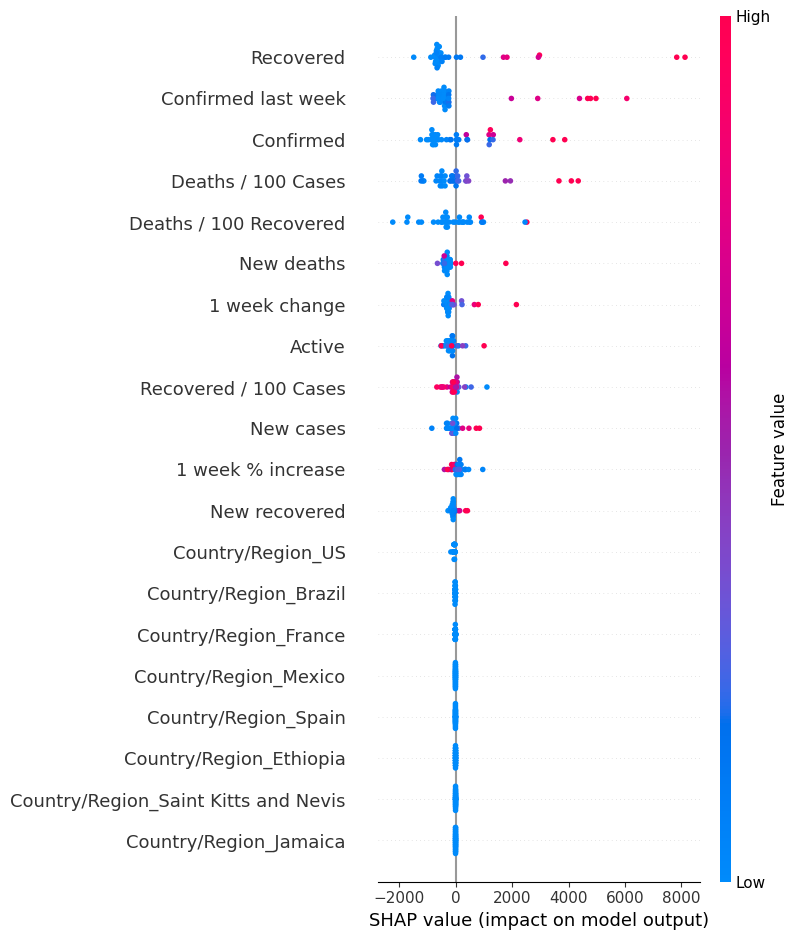

In [ ]:
import pandas as pd
import shap
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split

# Load the dataset into a Pandas DataFrame
data = pd.read_csv('/content/country_wise_latest.csv')

# Drop the "WHO Region" column
data = data.drop('WHO Region', axis=1)

# Perform one-hot encoding for "Country/Region"
encoded_data = pd.get_dummies(data, columns=['Country/Region'])

# Split the data into features (X) and target variable (y)
X = encoded_data.drop(['Deaths'], axis=1)
y = encoded_data['Deaths']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the CatBoostRegressor model and fit it to the training data
model = CatBoostRegressor(iterations=100, learning_rate=0.1, random_seed=42)
model.fit(X_train, y_train, verbose=False)

# Make predictions on the testing set
predictions = model.predict(X_test)

# Initialize the SHAP explainer
explainer = shap.Explainer(model)

# Compute SHAP values for the testing set
shap_values = explainer.shap_values(X_test)

# Visualize the SHAP summary plot
shap.summary_plot(shap_values, X_test)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 30999624.788737416
Mean Absolute Error: 2075.8766180096195


Streaming output truncated to the last 5000 lines.
1:	learn: 14191.2750865	total: 15.8ms	remaining: 1.56s
2:	learn: 13489.5924981	total: 24.6ms	remaining: 1.62s
3:	learn: 12535.5149666	total: 30.1ms	remaining: 1.48s
4:	learn: 11870.4207774	total: 35.5ms	remaining: 1.39s
5:	learn: 11356.8464590	total: 41.2ms	remaining: 1.33s
6:	learn: 10552.9123230	total: 46.5ms	remaining: 1.28s
7:	learn: 9812.6898936	total: 53.4ms	remaining: 1.28s
8:	learn: 9315.2936246	total: 58.5ms	remaining: 1.24s
9:	learn: 8876.2821538	total: 63.5ms	remaining: 1.21s
10:	learn: 8445.4479907	total: 68.9ms	remaining: 1.18s
11:	learn: 8069.5825210	total: 71ms	remaining: 1.11s
12:	learn: 7668.1779100	total: 76.2ms	remaining: 1.1s
13:	learn: 7276.5683033	total: 81.5ms	remaining: 1.08s
14:	learn: 6929.1386198	total: 86.8ms	remaining: 1.07s
15:	learn: 6631.2469330	total: 91.7ms	remaining: 1.05s
16:	learn: 6337.0498495	total: 97.3ms	remaining: 1.05s
17:	learn: 6038.0753083	total: 103ms	remaining: 1.04s
18:	learn: 5735.07210

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


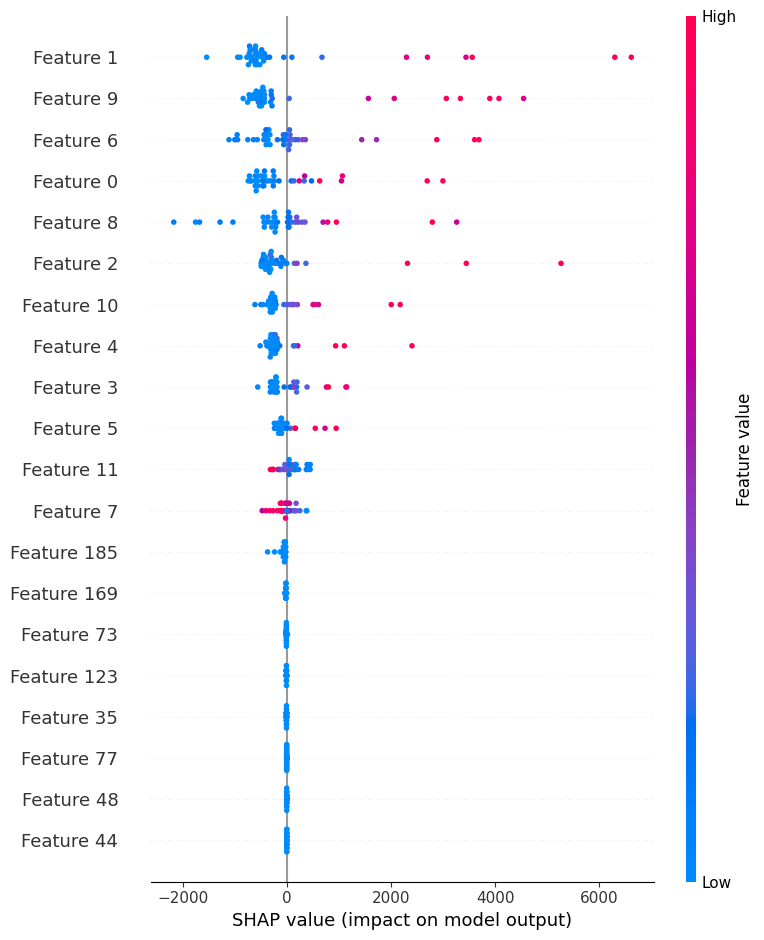

In [ ]:
import numpy as np
import pandas as pd
import shap
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the dataset into a Pandas DataFrame
data = pd.read_csv('/content/country_wise_latest.csv')

# Drop the "WHO Region" column
data = data.drop('WHO Region', axis=1)

# Perform one-hot encoding for "Country/Region"
encoded_data = pd.get_dummies(data, columns=['Country/Region'])

# Split the data into features (X) and target variable (y)
X = encoded_data.drop(['Deaths'], axis=1)
y = encoded_data['Deaths']

# Check for infinite or large values in X
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(0, inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check for infinite or large values in the scaled data
X_train_scaled = np.nan_to_num(X_train_scaled, nan=0.0, posinf=1e6, neginf=-1e6)
X_test_scaled = np.nan_to_num(X_test_scaled, nan=0.0, posinf=1e6, neginf=-1e6)

# Create an instance of the CatBoostRegressor model
model = CatBoostRegressor(random_seed=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'depth': [4, 6, 8]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best model and make predictions on the testing set
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test_scaled)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Initialize the SHAP explainer
explainer = shap.Explainer(best_model)

# Compute SHAP values for the testing set
shap_values = explainer.shap_values(X_test_scaled)

# Visualize the SHAP summary plot
shap.summary_plot(shap_values, X_test_scaled)


Streaming output truncated to the last 5000 lines.
1:	learn: 14191.2750865	total: 15.9ms	remaining: 1.57s
2:	learn: 13489.5924981	total: 23.9ms	remaining: 1.57s
3:	learn: 12535.5149666	total: 29ms	remaining: 1.42s
4:	learn: 11870.4207774	total: 34ms	remaining: 1.32s
5:	learn: 11356.8464590	total: 44.8ms	remaining: 1.45s
6:	learn: 10552.9123230	total: 52.6ms	remaining: 1.45s
7:	learn: 9812.6898936	total: 57.2ms	remaining: 1.37s
8:	learn: 9315.2936246	total: 62.1ms	remaining: 1.32s
9:	learn: 8876.2821538	total: 67ms	remaining: 1.27s
10:	learn: 8445.4479907	total: 72ms	remaining: 1.24s
11:	learn: 8069.5825210	total: 73.9ms	remaining: 1.16s
12:	learn: 7668.1779100	total: 78.6ms	remaining: 1.13s
13:	learn: 7276.5683033	total: 83.4ms	remaining: 1.11s
14:	learn: 6929.1386198	total: 88.2ms	remaining: 1.09s
15:	learn: 6631.2469330	total: 93.1ms	remaining: 1.07s
16:	learn: 6337.0498495	total: 97.9ms	remaining: 1.05s
17:	learn: 6038.0753083	total: 103ms	remaining: 1.04s
18:	learn: 5735.0721095	to

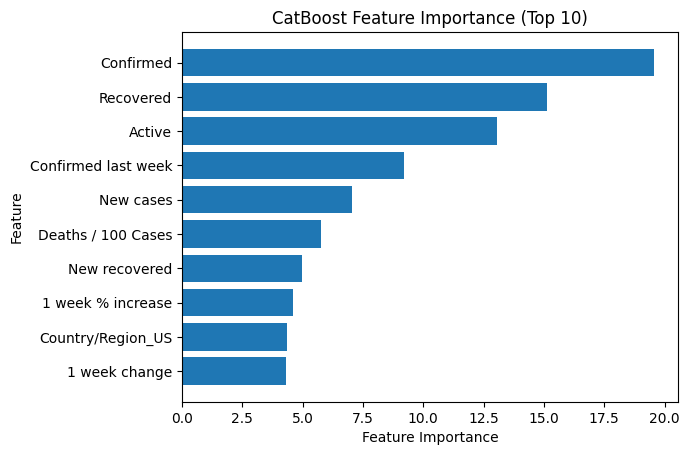

In [ ]:
import numpy as np
import pandas as pd
import shap
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the dataset into a Pandas DataFrame
data = pd.read_csv('/content/country_wise_latest.csv')

# Drop the "WHO Region" column
data = data.drop('WHO Region', axis=1)

# Perform one-hot encoding for "Country/Region"
encoded_data = pd.get_dummies(data, columns=['Country/Region'])

# Split the data into features (X) and target variable (y)
X = encoded_data.drop(['Deaths'], axis=1)
y = encoded_data['Deaths']

# Check for infinite or large values in X
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(0, inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check for infinite or large values in the scaled data
X_train_scaled = np.nan_to_num(X_train_scaled, nan=0.0, posinf=1e6, neginf=-1e6)
X_test_scaled = np.nan_to_num(X_test_scaled, nan=0.0, posinf=1e6, neginf=-1e6)

# Create an instance of the CatBoostRegressor model
model = CatBoostRegressor(random_seed=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'depth': [4, 6, 8]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best model and make predictions on the testing set
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test_scaled)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

feature_importance = best_model.get_feature_importance()

# Get the indices of the top 10 features
top_10_indices = np.argsort(feature_importance)[-10:]

# Get the names and importance scores of the top 10 features
top_10_features = X.columns[top_10_indices]
top_10_importance = feature_importance[top_10_indices]

# Plot feature importance bar graph for the top 10 features
plt.barh(top_10_features, top_10_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('CatBoost Feature Importance (Top 10)')
plt.show()

